In [4]:
import cv2
import os
print(os.getcwd())

image = cv2.imread("../io/images/bottle.png")
cv2.imshow("test_image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

/home/non/nhan_ws/src/SmartWorkcell/scripts


[09/22/2025-15:45:15] [TRT] [W] WARNING The logger passed into createInferRuntime differs from one already registered for an existing builder, runtime, or refitter. So the current new logger is ignored, and TensorRT will use the existing one which is returned by nvinfer1::getLogger() instead.
[09/22/2025-15:45:15] [TRT] [W] WARNING The logger passed into createInferRuntime differs from one already registered for an existing builder, runtime, or refitter. So the current new logger is ignored, and TensorRT will use the existing one which is returned by nvinfer1::getLogger() instead.
[09/22/2025-15:45:15] [TRT] [W] Using default stream in enqueueV3() may lead to performance issues due to additional calls to cudaStreamSynchronize() by TensorRT to ensure correct synchronization. Please use non-default stream instead.
[09/22/2025-15:45:15] [TRT] [W] Using default stream in enqueueV3() may lead to performance issues due to additional calls to cudaStreamSynchronize() by TensorRT to ensure corr

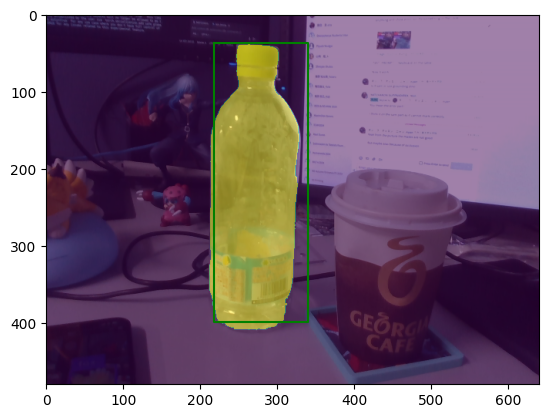

In [7]:
from nanosam.utils.predictor import Predictor
import PIL
import numpy as np
import matplotlib.pyplot as plt

predictor = Predictor(
    image_encoder_engine="../nanosam/data/resnet18_image_encoder.engine",
    mask_decoder_engine="../nanosam/data/mobile_sam_mask_decoder.engine"
)

image = PIL.Image.open("../io/images/bottle.png")

predictor.set_image(image)

# Segment using bounding box
bbox = [218, 36, 340, 398]  # x0, y0, x1, y1

points = np.array([
    [bbox[0], bbox[1]],
    [bbox[2], bbox[3]]
])

point_labels = np.array([2, 3])

mask, _, _ = predictor.predict(points, point_labels)
print(mask.shape)
mask = (mask[0, 0] > 0).detach().cpu().numpy()

# Draw resykts
plt.imshow(image)
plt.imshow(mask, alpha=0.5)
x = [bbox[0], bbox[2], bbox[2], bbox[0], bbox[0]]
y = [bbox[1], bbox[1], bbox[3], bbox[3], bbox[1]]
plt.plot(x, y, 'g-')
plt.savefig("../io/images/nanosam_test_output.jpg")